In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/DELL/Desktop/data_is_good/med_insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
data.shape

(1338, 7)

In [5]:
data.drop_duplicates()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


# Lets create EDA

In [6]:
count=data.columns.tolist()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


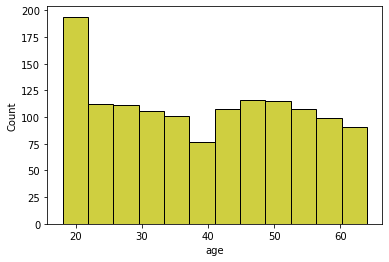

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object


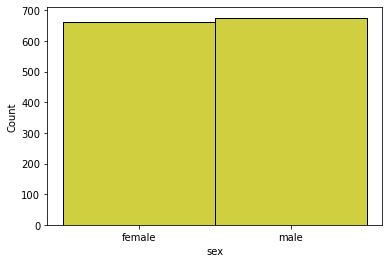

count    1338.000000
mean       30.665471
std         6.098382
min        16.000000
25%        26.300000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64


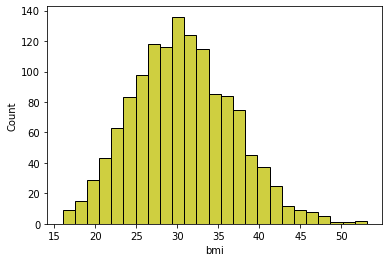

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64


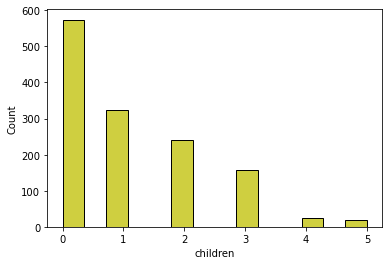

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object


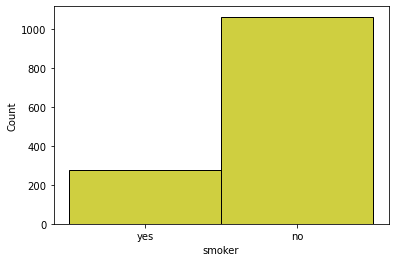

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object


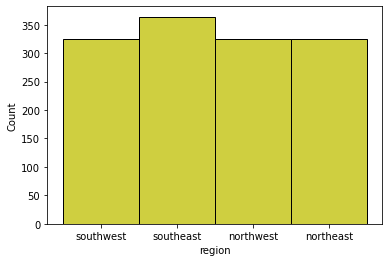

count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64


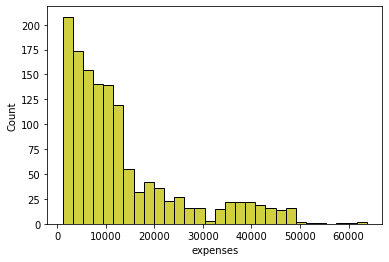

In [7]:
for i in count:
    print(data[i].describe())
    sns.histplot(x=i,data=data,color='y')
    plt.show()

In [114]:
corr_matrix=data.corr()
corr_matrix

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,-0.012816,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,-0.262750,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262750,0.001205,-0.038873,1.000000,-0.039473
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,-0.039473,1.000000


In [115]:
a=['age','bmi']
b=['sex','children','smoker','region']

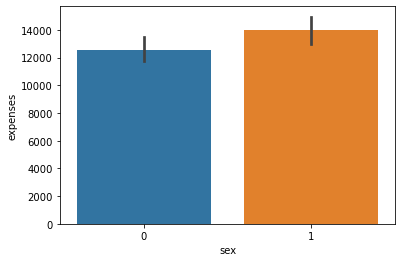

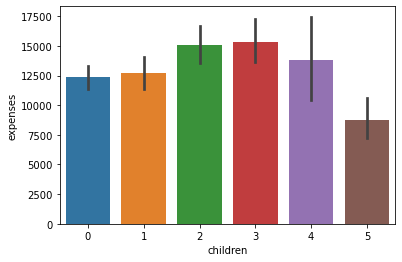

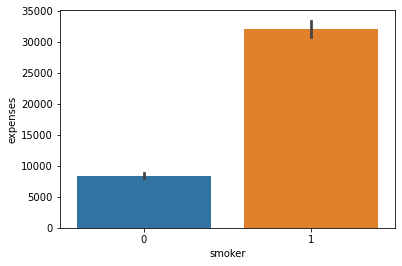

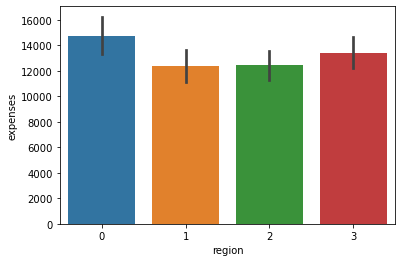

In [116]:
for i in b:
    sns.barplot(x=i,y='expenses',data=data)
    plt.show()

In [117]:
for i in a:
    sns.histplot(x=data[i],data['expenses']==0,color='r')
    sns.histplot(x=data[i],data['expenses']==1,color='y')
    plt.show()

SyntaxError: positional argument follows keyword argument (Temp/ipykernel_13224/250322679.py, line 2)

*#since after observing the given data we can clearly see that the expenses column in the dependent data and rest are the dependent data.
#That is why we are providing x with dependent data and y with independent data below.

In [8]:
data["smoker"].replace({"yes":1,"no":0},inplace=True)

In [9]:
data["region"].replace({"southeast":0,"southwest":1,"northwest":2,"northeast":3},inplace=True)

In [10]:
data["sex"].replace({"male":1,"female":0},inplace=True)

In [11]:
data.head(20)

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,0,1725.55
2,28,1,33.0,3,0,0,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86
5,31,0,25.7,0,0,0,3756.62
6,46,0,33.4,1,0,0,8240.59
7,37,0,27.7,3,0,2,7281.51
8,37,1,29.8,2,0,3,6406.41
9,60,0,25.8,0,0,2,28923.14


In [12]:
x=data.drop('expenses',axis=1)
y=data['expenses']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.80)

In [15]:
print(xtrain.shape)

(1070, 6)


In [16]:
print(xtest.shape)

(268, 6)


In [17]:
print(ytest.shape)

(268,)


In [18]:
#now lets train our 1st Machine Learning model which is Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model=LinearRegression()

In [21]:
model.fit(xtrain,ytrain)

LinearRegression()

In [22]:
model.intercept_

-13570.227389161962

In [23]:
model.coef_

array([  259.33412568,   -75.81743884,   349.56593251,   486.49423556,
       23928.47941906,   357.94102165])

In [24]:
ypred=model.predict(xtest)

In [25]:
ypred

array([38533.51856669,  8977.05628247, 14956.96953865, 11724.50325379,
       13239.26117405, 17358.16805775, 31836.60741939,  7123.28050311,
        8671.87101264,  6508.40932503, 27734.73065729,  4060.7787168 ,
         431.19727107,  6522.60053082,  6704.31675294, 15995.8291456 ,
        3982.34630046, 35228.92693368, 10430.03296644,  9425.31724665,
       29192.9738675 ,  8399.43017441, 33697.47832262,  8401.65787227,
        8289.28571225, 17873.76196777, 15467.99994051, 10016.23449482,
       10182.64237193, 33230.94407594, 16569.4139791 , 12798.97671408,
        8375.07636816, 11178.46892514, 33681.87950512, 26931.53485385,
        2693.54450655,  3294.06947559,  3559.44288011, 28925.40012191,
       15088.75209715, 18707.30396549,  4623.09039121, 11828.56719221,
       12886.62219161,  4049.81600695, 14232.77927375,  4250.71373342,
        8325.74491768,  1808.51151943,  3984.53448757,   170.76554016,
       10878.49755881,  7959.25382688, 16507.07004041, 12107.45534178,
      

In [26]:
from sklearn.metrics import mean_absolute_error,r2_score

In [27]:
print(mean_absolute_error(ytest,ypred))

4150.727532322753


In [28]:
print(r2_score(ytest,ypred))

0.7331126142550839


In [29]:
#now lets use Logistic Regression

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
model1=DecisionTreeRegressor()

In [32]:
model1.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [33]:
ypred=model1.predict(xtest)

In [34]:
ypred

array([27533.91,  8827.21,  9541.7 , 12629.9 , 14001.29, 11396.9 ,
       23306.55,  6664.69, 12094.48,  3659.35, 34472.84,  1917.32,
        1607.51,  5267.82,  5472.45, 12982.87,  5615.37, 39047.29,
        9447.25, 17929.3 , 19040.88, 19214.71, 38245.59,  5630.46,
       28340.19, 14235.07, 28287.9 ,  9447.25, 11015.17, 24180.93,
       13470.8 , 10704.47,  3935.18,  7265.7 , 39597.41, 17468.98,
       21344.85,  2261.57,  1261.86, 19023.26, 10115.01, 11396.9 ,
       27724.29, 11286.54, 11289.11,  4529.48, 11743.93,  3757.84,
        6548.2 ,  3180.51,  3046.06,  1704.57,  7639.42, 18963.17,
       11394.07,  7265.7 , 33732.69, 10450.55, 10601.41,  4562.84,
        2498.41, 15518.18,  2217.6 , 29141.36, 39836.52, 48885.14,
        2803.7 , 10370.91, 12949.16,  5002.78,  6113.23, 20745.99,
       28468.92, 36397.58,  6455.86, 17179.52,  2719.28, 11884.05,
       24513.09, 14313.85,  5976.83,  4687.8 , 14590.63,  2134.9 ,
       44585.46,  7986.48,  6933.24,  3208.79, 20234.85,  5976

In [35]:
from sklearn.metrics import r2_score

In [36]:
print(r2_score(ytest,ypred))

0.6413033289111575


In [37]:
#lets use Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
model2=RandomForestRegressor(n_estimators=5,max_depth=3,max_leaf_nodes=4,max_features=5)

In [40]:
model2.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=3, max_features=5, max_leaf_nodes=4,
                      n_estimators=5)

In [41]:
from sklearn.metrics import r2_score

In [42]:
model2=model.fit(xtrain,ytrain)

In [43]:
ytest

92      30184.94
310      8444.47
720      9875.68
9       28923.14
912     14382.71
          ...   
1301    46718.16
1309     6875.96
1176    23887.66
222      5253.52
369      3481.87
Name: expenses, Length: 268, dtype: float64

In [44]:
ypred=model.predict(xtest)

In [45]:
ypred

array([38533.51856669,  8977.05628247, 14956.96953865, 11724.50325379,
       13239.26117405, 17358.16805775, 31836.60741939,  7123.28050311,
        8671.87101264,  6508.40932503, 27734.73065729,  4060.7787168 ,
         431.19727107,  6522.60053082,  6704.31675294, 15995.8291456 ,
        3982.34630046, 35228.92693368, 10430.03296644,  9425.31724665,
       29192.9738675 ,  8399.43017441, 33697.47832262,  8401.65787227,
        8289.28571225, 17873.76196777, 15467.99994051, 10016.23449482,
       10182.64237193, 33230.94407594, 16569.4139791 , 12798.97671408,
        8375.07636816, 11178.46892514, 33681.87950512, 26931.53485385,
        2693.54450655,  3294.06947559,  3559.44288011, 28925.40012191,
       15088.75209715, 18707.30396549,  4623.09039121, 11828.56719221,
       12886.62219161,  4049.81600695, 14232.77927375,  4250.71373342,
        8325.74491768,  1808.51151943,  3984.53448757,   170.76554016,
       10878.49755881,  7959.25382688, 16507.07004041, 12107.45534178,
      

In [46]:
print(r2_score(ytest,ypred))

0.7331126142550839


In [47]:
# K Nearest Neighbour

In [48]:
k=range(2,10)
from sklearn.cluster import KMeans

In [49]:
distance=[]
for i in k:
    algo=KMeans(n_clusters=i)
    algo.fit(data)
    distance.append(algo.inertia_)

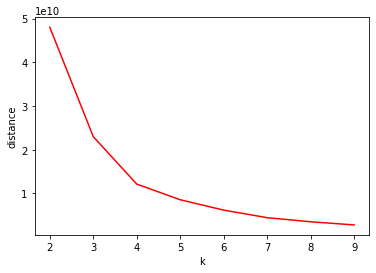

In [50]:
plt.plot(k,distance,color='r')
plt.xlabel('k')
plt.ylabel('distance')
plt.show()

In [51]:
model=KMeans(n_clusters=4,n_init=2000)
model.fit(data)

KMeans(n_clusters=4, n_init=2000)

In [52]:
model.labels_

array([3, 0, 0, ..., 0, 0, 1])

In [53]:
print(np.unique(model.labels_))

[0 1 2 3]


In [54]:
c=model.cluster_centers_
c

array([[2.93226950e+01, 5.03546099e-01, 3.01008865e+01, 1.00886525e+00,
        2.77555756e-17, 1.41843972e+00, 4.23287271e+03],
       [4.10511364e+01, 5.11363636e-01, 2.81636364e+01, 1.22159091e+00,
        5.79545455e-01, 1.51136364e+00, 2.25250203e+04],
       [3.95483871e+01, 6.32258065e-01, 3.50522581e+01, 1.13548387e+00,
        9.67741935e-01, 1.19354839e+00, 4.12245811e+04],
       [5.09390519e+01, 4.60496614e-01, 3.08433409e+01, 1.13995485e+00,
        4.96613995e-02, 1.57110609e+00, 1.13188969e+04]])

In [55]:
from sklearn.metrics import silhouette_score

In [56]:
print(silhouette_score(data,model.labels_))

0.610505582911769


In [57]:
#Support Vector Machine

In [83]:
from sklearn.svm import SVR

In [84]:
model3=SVR()

In [85]:
model3.fit(xtrain,ytrain)

SVR()

In [95]:
ypre=model3.predict(xtest)

In [96]:
ypre

array([9330.00436868, 9277.64782513, 9288.06252951, 9331.51796705,
       9327.80591985, 9292.48835581, 9257.31340204, 9209.82979684,
       9296.64294138, 9160.59990573, 9105.86406902, 9109.31447284,
       9103.37155047, 9183.7767853 , 9184.4889621 , 9342.201172  ,
       9125.92381086, 9234.90236196, 9278.05211648, 9246.17489079,
       9153.68539486, 9169.4748197 , 9270.92107053, 9175.46013506,
       9251.66789009, 9342.68107782, 9331.13243549, 9265.14885943,
       9265.99722435, 9257.8672822 , 9342.11651756, 9310.99199044,
       9174.75125897, 9228.33444167, 9213.12833262, 9117.25817896,
       9103.75833616, 9106.66649619, 9108.07462392, 9182.95159777,
       9257.17566096, 9290.89472064, 9109.26129193, 9309.28038834,
       9293.64708646, 9153.32610257, 9326.69515316, 9148.00399559,
       9184.39662541, 9111.49103195, 9124.77112236, 9104.89727928,
       9234.43761381, 9150.49195129, 9320.31702183, 9235.02429797,
       9104.65351998, 9305.63896626, 9326.2695963 , 9159.85416

In [98]:
print(r2_score(ytest,ypre))

-0.10535065991841353


In [99]:
model.score(xtest,ytest)

-14218.312173295857

In [ ]:
# WE have used the algorithms Linear Regression,Decision Tree,Random Forest,Support Vector Machine and Kmeans with highest recorded accuracy of 83.7 percentage
